<a href="https://colab.research.google.com/github/LTPDat/AI/blob/main/W7_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical #Để chuyển thành one hot encoding
from keras.models import load_model
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

<function matplotlib.pyplot.show(close=None, block=None)>

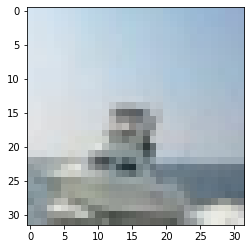

In [4]:
hinh = train_images[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
train_images = train_images.reshape((50000,32*32*3)) #Chuyển về input 1 chiều
train_images = train_images.astype('float32')/255 #Ảnh có giá trị 0-->255, Scale xuống thành 0-->1
test_images =  test_images.reshape((10000, 32*32*3)) #Chuyển về input 1 chiều
test_images = test_images.astype('float32')/255
train_images.shape

(50000, 3072)

In [8]:
train_labels = to_categorical(train_labels, 10) #One hot encoding
test_labels = to_categorical(test_labels, 10)
print(train_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


In [10]:
model = Sequential()
model.add(Dense(512,input_shape = (32*32*3,), activation='relu', name="Layer_1"))
model.add(Dense(256, activation='relu', name="Layer_2"))
model.add(Dense(128, activation='relu', name="Layer_3"))
model.add(Dense(64, activation='relu', name="Layer_4"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Layer_4 (Dense)             (None, 64)                8256      
                                                                 
 Output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 16s 37ms/step - loss: 2.0553 - accuracy: 0.2478
Epoch 2/10
391/391 [==============================] - 15s 38ms/step - loss: 1.8062 - accuracy: 0.3484
Epoch 3/10
391/391 [==============================] - 15s 38ms/step - loss: 1.7012 - accuracy: 0.3915
Epoch 4/10
391/391 [==============================] - 15s 38ms/step - loss: 1.6373 - accuracy: 0.4147
Epoch 5/10
391/391 [==============================] - 17s 43ms/step - loss: 1.5841 - accuracy: 0.4337
Epoch 6/10
391/391 [==============================] - 14s 37ms/step - loss: 1.5488 - accuracy: 0.4463
Epoch 7/10
391/391 [==============================] - 14s 36ms/step - loss: 1.5094 - accuracy: 0.4622
Epoch 8/10
391/391 [==============================] - 14s 35ms/step - loss: 1.4756 - accuracy: 0.4716
Epoch 9/10
391/391 [==============================] - 14s 36ms/step - loss: 1.4507 - accuracy: 0.4816
Epoch 10/10
391/391 [==============================] - 17s 43ms/step - loss: 1.419

In [12]:
model.fit(train_images, train_labels, epochs=20, batch_size=256)

Epoch 1/20
196/196 [==============================] - 12s 59ms/step - loss: 1.3625 - accuracy: 0.5121
Epoch 2/20
196/196 [==============================] - 11s 54ms/step - loss: 1.3470 - accuracy: 0.5190
Epoch 3/20
196/196 [==============================] - 11s 56ms/step - loss: 1.3197 - accuracy: 0.5282
Epoch 4/20
196/196 [==============================] - 12s 60ms/step - loss: 1.3026 - accuracy: 0.5326
Epoch 5/20
196/196 [==============================] - 11s 56ms/step - loss: 1.2803 - accuracy: 0.5439
Epoch 6/20
196/196 [==============================] - 11s 57ms/step - loss: 1.2597 - accuracy: 0.5512
Epoch 7/20
196/196 [==============================] - 11s 56ms/step - loss: 1.2469 - accuracy: 0.5546
Epoch 8/20
196/196 [==============================] - 11s 56ms/step - loss: 1.2246 - accuracy: 0.5608
Epoch 9/20
196/196 [==============================] - 10s 50ms/step - loss: 1.2104 - accuracy: 0.5668
Epoch 10/20
196/196 [==============================] - 11s 57ms/step - loss: 1.193

In [13]:
model.fit(train_images, train_labels, epochs=20, batch_size=256)

Epoch 1/20
196/196 [==============================] - 11s 55ms/step - loss: 1.0127 - accuracy: 0.6362
Epoch 2/20
196/196 [==============================] - 11s 56ms/step - loss: 0.9933 - accuracy: 0.6411
Epoch 3/20
196/196 [==============================] - 11s 56ms/step - loss: 0.9803 - accuracy: 0.6476
Epoch 4/20
196/196 [==============================] - 11s 55ms/step - loss: 0.9634 - accuracy: 0.6519
Epoch 5/20
196/196 [==============================] - 11s 54ms/step - loss: 0.9521 - accuracy: 0.6559
Epoch 6/20
196/196 [==============================] - 10s 51ms/step - loss: 0.9346 - accuracy: 0.6617
Epoch 7/20
196/196 [==============================] - 11s 55ms/step - loss: 0.9243 - accuracy: 0.6654
Epoch 8/20
196/196 [==============================] - 11s 56ms/step - loss: 0.9090 - accuracy: 0.6731
Epoch 9/20
196/196 [==============================] - 11s 56ms/step - loss: 0.8973 - accuracy: 0.6749
Epoch 10/20
196/196 [==============================] - 11s 56ms/step - loss: 0.885

In [19]:
model.fit(train_images, train_labels, epochs=20, batch_size=256)

Epoch 1/20
196/196 [==============================] - 11s 58ms/step - loss: 0.7484 - accuracy: 0.7289
Epoch 2/20
196/196 [==============================] - 11s 57ms/step - loss: 0.7445 - accuracy: 0.7311
Epoch 3/20
196/196 [==============================] - 14s 69ms/step - loss: 0.7340 - accuracy: 0.7372
Epoch 4/20
196/196 [==============================] - 12s 61ms/step - loss: 0.7262 - accuracy: 0.7392
Epoch 5/20
196/196 [==============================] - 11s 58ms/step - loss: 0.7151 - accuracy: 0.7413
Epoch 6/20
196/196 [==============================] - 12s 60ms/step - loss: 0.6993 - accuracy: 0.7464
Epoch 7/20
196/196 [==============================] - 12s 59ms/step - loss: 0.6914 - accuracy: 0.7494
Epoch 8/20
196/196 [==============================] - 13s 67ms/step - loss: 0.6864 - accuracy: 0.7519
Epoch 9/20
196/196 [==============================] - 12s 62ms/step - loss: 0.6748 - accuracy: 0.7571
Epoch 10/20
196/196 [==============================] - 11s 55ms/step - loss: 0.669

In [27]:
model.fit(train_images, train_labels, epochs=20, batch_size=256)

Epoch 1/20
196/196 [==============================] - 10s 52ms/step - loss: 0.5808 - accuracy: 0.7895
Epoch 2/20
196/196 [==============================] - 11s 56ms/step - loss: 0.5772 - accuracy: 0.7914
Epoch 3/20
196/196 [==============================] - 11s 56ms/step - loss: 0.5699 - accuracy: 0.7956
Epoch 4/20
196/196 [==============================] - 11s 56ms/step - loss: 0.5606 - accuracy: 0.7990
Epoch 5/20
196/196 [==============================] - 11s 57ms/step - loss: 0.5578 - accuracy: 0.7992
Epoch 6/20
196/196 [==============================] - 10s 53ms/step - loss: 0.5570 - accuracy: 0.7994
Epoch 7/20
196/196 [==============================] - 10s 53ms/step - loss: 0.5418 - accuracy: 0.8051
Epoch 8/20
196/196 [==============================] - 11s 57ms/step - loss: 0.5444 - accuracy: 0.8061
Epoch 9/20
196/196 [==============================] - 11s 56ms/step - loss: 0.5312 - accuracy: 0.8097
Epoch 10/20
196/196 [==============================] - 11s 58ms/step - loss: 0.531

1/1 [==============================] - 0s 34ms/step


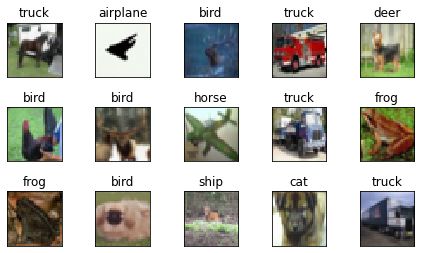

In [28]:
x_sample = test_images[20:35]
pred = np.argmax(model.predict(x_sample), axis=-1)
x_sample = np.reshape(x_sample, (15,32, 32,3))
class_name = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_sample[i], cmap='gray', interpolation='none')
  plt.title('{}'.format(class_name[pred[i]]))
  plt.xticks([])
  plt.yticks([])